Patient Health Indicators Analysis

Import libraries 

In [66]:
import pandas as pd

Load & Inspect Data

In [5]:
patient_data = pd.read_csv(r'C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Public Health\Patient_Health_Indicators.csv')

In [6]:
print(f'Columns with Rows: {patient_data.head()}')

Columns with Rows:    Patient_ID  Age  Gender  Blood_Pressure  Cholesterol  Glucose_Level  Fever  \
0           1   69  Female             166          201             75      0   
1           2   32    Male             106          215            139      0   
2           3   89    Male             154          150            173      0   
3           4   78    Male             167          166            168      0   
4           5   38  Female              90          254            139      0   

   Cough  Fatigue  Pain  Smoker  Diabetic  Heart_Disease      Diagnosis  
0      0        0     0       1         0              0        Healthy  
1      1        1     1       0         0              0        Healthy  
2      1        1     0       0         0              0        Healthy  
3      0        1     0       0         0              1  Heart Disease  
4      0        1     1       1         0              0        Healthy  


In [7]:
print(f'Shape of Data(Rows & Columns): {patient_data.shape}')

Shape of Data(Rows & Columns): (50000, 14)


In [8]:
print(f'Info: {patient_data.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      50000 non-null  int64 
 1   Age             50000 non-null  int64 
 2   Gender          50000 non-null  object
 3   Blood_Pressure  50000 non-null  int64 
 4   Cholesterol     50000 non-null  int64 
 5   Glucose_Level   50000 non-null  int64 
 6   Fever           50000 non-null  int64 
 7   Cough           50000 non-null  int64 
 8   Fatigue         50000 non-null  int64 
 9   Pain            50000 non-null  int64 
 10  Smoker          50000 non-null  int64 
 11  Diabetic        50000 non-null  int64 
 12  Heart_Disease   50000 non-null  int64 
 13  Diagnosis       50000 non-null  object
dtypes: int64(12), object(2)
memory usage: 5.3+ MB
Info: None


In [9]:
print('\nNumeric Summary')
patient_data.describe()


Numeric Summary


,Patient_ID,Age,Blood_Pressure,Cholesterol,Glucose_Level,Fever,Cough,Fatigue,Pain,Smoker,Diabetic,Heart_Disease
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000
mean,25000.500000,53.398700,134.541120,224.312560,134.806560,0.199980,0.300920,0.397780,0.350040,0.301120,0.247900,0.15068
std,14433.901067,20.799006,26.001862,43.252848,37.548952,0.399989,0.458663,0.489444,0.476987,0.458749,0.431798,0.35774
min,1.000000,18.000000,90.000000,150.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,12500.750000,35.000000,112.000000,187.000000,102.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,25000.500000,53.000000,135.000000,224.000000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,37500.250000,71.000000,157.000000,262.000000,168.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.00000
max,50000.000000,89.000000,179.000000,299.000000,199.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [10]:
print('\n Missing Values')
patient_data.isnull().sum()


 Missing Values


Patient_ID        0
Age               0
Gender            0
Blood_Pressure    0
Cholesterol       0
Glucose_Level     0
Fever             0
Cough             0
Fatigue           0
Pain              0
Smoker            0
Diabetic          0
Heart_Disease     0
Diagnosis         0
dtype: int64

In [11]:
print('\nDuplicate Rows')
print(patient_data.duplicated().sum())


Duplicate Rows
0


In [12]:
print('\nGender Values Count')
print(patient_data['Gender'].value_counts())


Gender Values Count
Gender
Female    25086
Male      24914
Name: count, dtype: int64


In [13]:
print(f'Stats of Columns: {patient_data.describe()}')

Stats of Columns:          Patient_ID           Age  Blood_Pressure   Cholesterol  \
count  50000.000000  50000.000000    50000.000000  50000.000000   
mean   25000.500000     53.398700      134.541120    224.312560   
std    14433.901067     20.799006       26.001862     43.252848   
min        1.000000     18.000000       90.000000    150.000000   
25%    12500.750000     35.000000      112.000000    187.000000   
50%    25000.500000     53.000000      135.000000    224.000000   
75%    37500.250000     71.000000      157.000000    262.000000   
max    50000.000000     89.000000      179.000000    299.000000   

       Glucose_Level         Fever         Cough       Fatigue          Pain  \
count   50000.000000  50000.000000  50000.000000  50000.000000  50000.000000   
mean      134.806560      0.199980      0.300920      0.397780      0.350040   
std        37.548952      0.399989      0.458663      0.489444      0.476987   
min        70.000000      0.000000      0.000000      0.00

Data Cleaning

In [15]:
for col in ['Gender', 'Diagnosis']:
    patient_data[col] = patient_data[col].astype('category')

In [16]:
patient_data['High_BP'] = (patient_data['Blood_Pressure'] > 140).astype(int)
patient_data['High_Chol'] = (patient_data['Cholesterol'] > 240).astype(int)
patient_data['High_Glucose'] = (patient_data['Glucose_Level'] > 150).astype(int)

In [17]:
print("\nHigh flag counts:")
print("High_BP:", patient_data['High_BP'].sum())
print("High_Chol:", patient_data['High_Chol'].sum())
print("High_Glucose:", patient_data['High_Glucose'].sum())


High flag counts:
High_BP: 21691
High_Chol: 19534
High_Glucose: 18958


In [18]:
patient_data['Risk_Score'] = (patient_data[['High_BP', 'High_Chol', 'High_Glucose', 'Smoker', 'Diabetic', 'Heart_Disease']].sum(axis=1))
patient_data['High_Risk'] = (patient_data['Risk_Score'] >= 2).astype(int)
print("\nHigh_Risk counts (Risk_Score >= 2):")
print(patient_data['High_Risk'].value_counts())


High_Risk counts (Risk_Score >= 2):
High_Risk
1    31130
0    18870
Name: count, dtype: int64


In [19]:
patient_data.to_csv(r'C:\Users\navee\OneDrive\Desktop\HR ANALYTICS\Public Health\Cleaned_Patient_Data.csv', index=False)
print("Cleaned dataset saved as Cleaned_Patient_Data.csv")

Cleaned dataset saved as Cleaned_Patient_Data.csv


EDA

In [21]:
print("Gender distribution")
print(patient_data['Gender'].value_counts())

Gender distribution
Gender
Female    25086
Male      24914
Name: count, dtype: int64


In [22]:
print('Diagnosis distribution')
print(patient_data['Diagnosis'].value_counts())

Diagnosis distribution
Diagnosis
Healthy          29910
Hypertension      7705
Heart Disease     5374
Diabetes          4781
Flu               2230
Name: count, dtype: int64


In [23]:
print('High Risk distribution')
print(patient_data['High_Risk'].value_counts())

High Risk distribution
High_Risk
1    31130
0    18870
Name: count, dtype: int64


In [24]:
print('Mean clinical values by High_Risk')
print(patient_data.groupby('High_Risk')[['Blood_Pressure','Cholesterol','Glucose_Level']].mean())

Mean clinical values by High_Risk
           Blood_Pressure  Cholesterol  Glucose_Level
High_Risk                                            
0              123.778908   207.310122     119.870111
1              141.064825   234.618889     143.860553


In [25]:
age_risk = patient_data.groupby('Age')[['High_Risk']].mean()
print('High Risk Rate by Age')
print(age_risk.head(10))

High Risk Rate by Age
     High_Risk
Age           
18    0.604106
19    0.610879
20    0.653846
21    0.633663
22    0.623066
23    0.586648
24    0.622754
25    0.618287
26    0.619519
27    0.609551


Visualizations

Age Distribution of Patients

In [28]:
import matplotlib.pyplot as plt

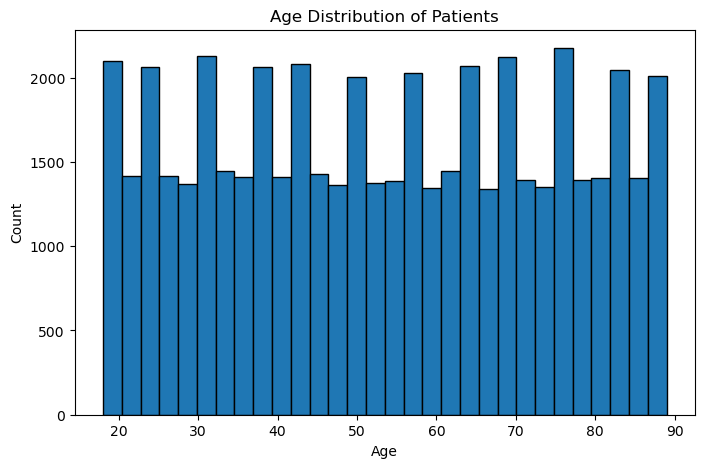

In [29]:
plt.figure(figsize=(8,5))
plt.hist(patient_data['Age'], bins=30, edgecolor= 'black')
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Blood Pressure by Age Group

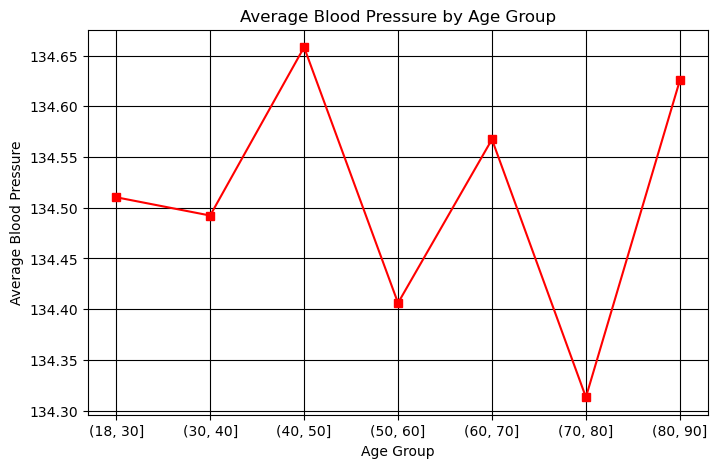

In [31]:
age_groups = pd.cut(patient_data['Age'], bins=[18,30,40,50,60,70,80,90])
bp_by_age = patient_data.groupby(age_groups, observed=False)['Blood_Pressure'].mean()

plt.figure(figsize=(8,5))
bp_by_age.plot(kind='line', color='red', marker='s')
plt.title('Average Blood Pressure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Blood Pressure')
plt.grid(color='black')
plt.show()

High Risk vs Healthy Patients

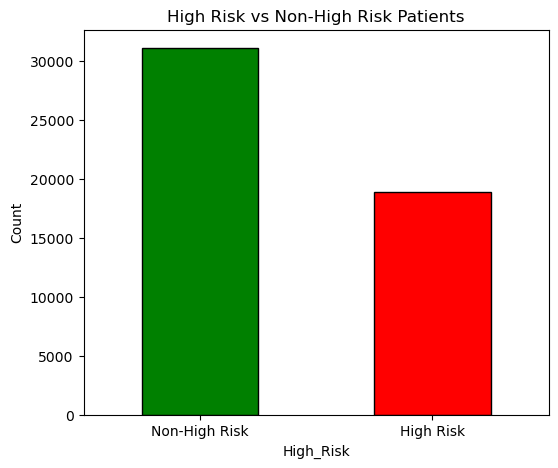

In [33]:
plt.figure(figsize=(6,5))
patient_data['High_Risk'].value_counts().plot(kind='bar', color=['green', 'red'] , edgecolor='black')
plt.title('High Risk vs Non-High Risk Patients')
plt.xticks([0,1], ['Non-High Risk','High Risk'], rotation=0)
plt.ylabel('Count')
plt.show()

Diagnosis Distribution (Pie Chart)

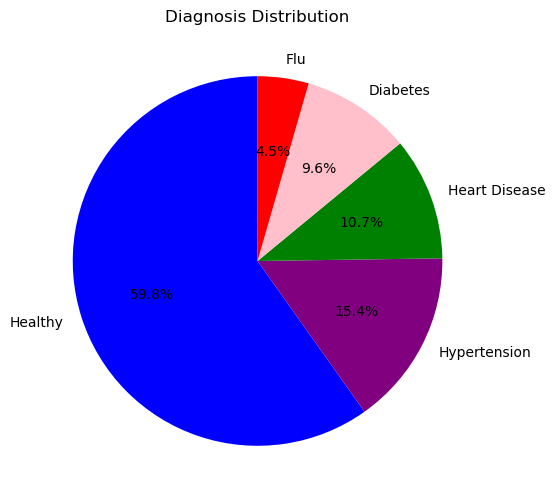

In [35]:
plt.figure(figsize=(6,6))
patient_data['Diagnosis'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['blue','purple','green','pink','red'])
plt.title('Diagnosis Distribution')
plt.ylabel("")
plt.show()

Risk Score Distribution by Gender

<Figure size 700x500 with 0 Axes>

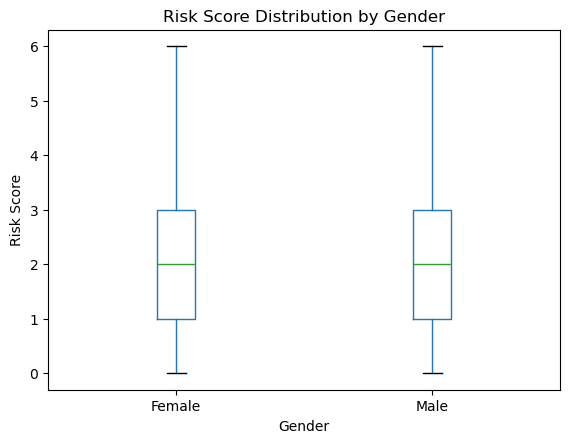

In [37]:
plt.figure(figsize=(7,5))
patient_data.boxplot(column='Risk_Score', by='Gender', grid=False)
plt.title("Risk Score Distribution by Gender")
plt.suptitle("")
plt.xlabel("Gender")
plt.ylabel("Risk Score")
plt.show()